In [84]:
%pip install ../../mlrose/
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

Processing /Users/VivianNTran/Documents/CS7641 - ML/Assignment 2/mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=102999 sha256=7b775e8c343e7f3ac5ff27d6fd0baa4b92830ef1d8f67c642393f81cebfff8f6
  Stored in directory: /private/var/folders/rk/9q8_q_l50ls0c1pdxg38z9m80000gp/T/pip-ephem-wheel-cache-hjczc46a/wheels/6d/5b/da/7cf5d7915d22f9006694bfefef2b605b6ed6540017cd5e1e1a
Successfully built mlrose-hiive
  Attempting uninstall: mlrose-hiive
    Found existing installation: mlrose-hiive 2.2.4
    Uninstalling mlrose-hiive-2.2.4:
      Successfully uninstalled mlrose-hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [85]:
RANDOM_STATE = 101
seeds = [1, 7, 9, 101, 127]
max_iters = 100
max_attempts = 100
length = 40

In [86]:
# Define fitness function
problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)

### RO Algorithm Experiments

In [87]:
# Define fitness function
problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)

In [88]:
# Randomized Hill Climbing
avg_rhc_run = []
for restart in [0, 25, 50, 75, 100]:
    restart_array = []
    for seed in seeds:
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = restart, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        restart_array.append(rhc_fitness_curve)
    avg_rhc_run.append(restart_array)


# average the curves
rhc_avgs = []
for i in range(len(avg_rhc_run)):
    avg = []
    for j in range(len(avg_rhc_run[i])):
        avg.append(avg_rhc_run[i][j][:,0])
    rhc_avgs.append(avg)

# Generating lines and confidence intervals
a = np.array(rhc_avgs[0])
rhc_restart_0 = np.mean(a, axis=0)
rhc_restart_0_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[1])
rhc_restart_25 = np.mean(a, axis=0)
rhc_restart_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[2])
rhc_restart_50 = np.mean(a, axis=0)
rhc_restart_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[3])
rhc_restart_75 = np.mean(a, axis=0)
rhc_restart_75_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(rhc_avgs[4])
rhc_restart_100 = np.mean(a, axis=0)
rhc_restart_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [89]:
# Simulated Annealing
avg_sa_run_temp = []
for temp in [.25, .5, 1]:
    temp_array = []
    for seed in seeds:
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
        schedule = mlrose.GeomDecay(init_temp = temp)
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        temp_array.append(sa_fitness_curve)
    avg_sa_run_temp.append(temp_array)

# average the curves
sa_avgs = []
for i in range(len(avg_sa_run_temp)):
    avg = []
    for j in range(len(avg_sa_run_temp[i])):
        avg.append(avg_sa_run_temp[i][j][:,0])
    sa_avgs.append(avg)

a = np.array(sa_avgs[0])
sa_temp_25 = np.mean(a, axis=0)
sa_temp_25_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[1])
sa_temp_5 = np.mean(a, axis=0)
sa_temp_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(sa_avgs[2])
sa_temp_1 = np.mean(a, axis=0)
sa_temp_1_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [90]:
# Genetic Algorithm
avg_ga_run_pop = []
avg_ga_run_mutate = []
    
for pop_size in [50, 100, 500]:
    pop_array = []
    for seed in seeds:
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = pop_size, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pop_array.append(ga_fitness_curve)
    avg_ga_run_pop.append(pop_array)
        
    
for mutation in [0.1, 0.5, 0.75]:
    mutate_array = []
    for seed in seeds:
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, mutation_prob = mutation, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        mutate_array.append(ga_fitness_curve)
    avg_ga_run_mutate.append(mutate_array)

# average the curves
ga_avgs = []
for i in range(len(avg_ga_run_pop)):
    avg = []
    for j in range(len(avg_ga_run_pop[i])):
        avg.append(avg_ga_run_pop[i][j][:,0])
    ga_avgs.append(avg)

a = np.array(ga_avgs[0])
ga_pop_50 = np.mean(a, axis=0)
ga_pop_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[1])
ga_pop_100 = np.mean(a, axis=0)
ga_pop_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[2])
ga_pop_500 = np.mean(a, axis=0)
ga_pop_500_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

# average the curves
ga_avgs = []
for i in range(len(avg_ga_run_mutate)):
    avg = []
    for j in range(len(avg_ga_run_mutate[i])):
        avg.append(avg_ga_run_mutate[i][j][:,0])
    ga_avgs.append(avg)

a = np.array(ga_avgs[0])
ga_mutate_1 = np.mean(a, axis=0)
ga_mutate_1_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[1])
ga_mutate_5 = np.mean(a, axis=0)
ga_mutate_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(ga_avgs[2])
ga_mutate_75 = np.mean(a, axis=0)
ga_mutate_75_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

In [91]:
# MIMIC
avg_mimic_run_pop = []
avg_mimic_run_pct = []

for pop_size in [50, 100, 500]:
    pop_array = []
    for seed in seeds:
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = pop_size, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pop_array.append(mimic_fitness_curve)
    avg_mimic_run_pop.append(pop_array)
        
    
for pct in [0.2, 0.5, 0.8]:
    pct_array = []
    for seed in seeds:
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, keep_pct = pct, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        pct_array.append(mimic_fitness_curve)
    avg_mimic_run_pct.append(pct_array)

# average the curves
mimic_avgs = []
for i in range(len(avg_mimic_run_pop)):
    avg = []
    for j in range(len(avg_mimic_run_pop[i])):
        avg.append(avg_mimic_run_pop[i][j][:,0])
    mimic_avgs.append(avg)

a = np.array(mimic_avgs[0])
mimic_pop_50 = np.mean(a, axis=0)
mimic_pop_50_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[1])
mimic_pop_100 = np.mean(a, axis=0)
mimic_pop_100_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[2])
mimic_pop_500 = np.mean(a, axis=0)
mimic_pop_500_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

# average the curves
mimic_avgs = []
for i in range(len(avg_mimic_run_pct)):
    avg = []
    for j in range(len(avg_mimic_run_pct[i])):
        avg.append(avg_mimic_run_pct[i][j][:,0])
    mimic_avgs.append(avg)

a = np.array(mimic_avgs[0])
mimic_pct_2 = np.mean(a, axis=0)
mimic_pct_2_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[1])
mimic_pct_5 = np.mean(a, axis=0)
mimic_pct_5_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))
a = np.array(mimic_avgs[2])
mimic_pct_8 = np.mean(a, axis=0)
mimic_pct_8_ci = 1.96 * np.std(a, axis=0) / np.sqrt(len(a))

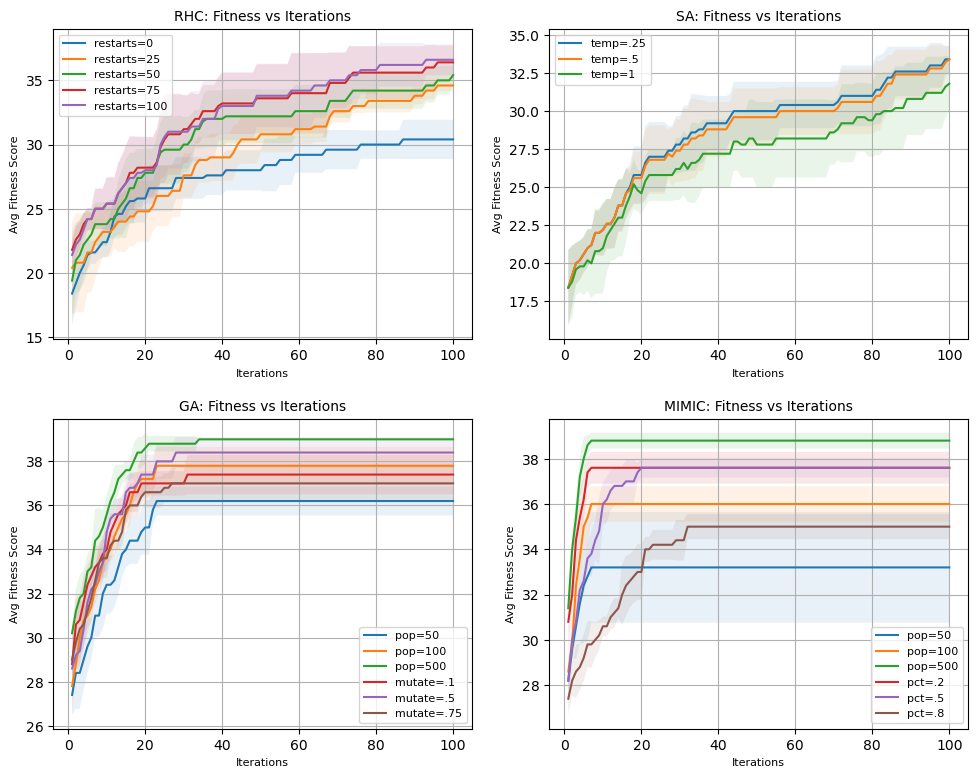

In [92]:
iterations = range(1, max_iters+1)

fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs[0, 0].grid()
axs[0, 0].plot(iterations, rhc_restart_0, label = 'restarts=0')
axs[0, 0].fill_between(iterations, (rhc_restart_0 - rhc_restart_0_ci), (rhc_restart_0 + rhc_restart_0_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_25, label = 'restarts=25')
axs[0, 0].fill_between(iterations, (rhc_restart_25 - rhc_restart_25_ci), (rhc_restart_25 + rhc_restart_25_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_50, label = 'restarts=50')
axs[0, 0].fill_between(iterations, (rhc_restart_50 - rhc_restart_50_ci), (rhc_restart_50 + rhc_restart_50_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_75, label = 'restarts=75')
axs[0, 0].fill_between(iterations, (rhc_restart_75 - rhc_restart_75_ci), (rhc_restart_75 + rhc_restart_75_ci), alpha=0.1)
axs[0, 0].plot(iterations, rhc_restart_100, label = 'restarts=100')
axs[0, 0].fill_between(iterations, (rhc_restart_100 - rhc_restart_100_ci), (rhc_restart_100 + rhc_restart_100_ci), alpha=0.1)
axs[0, 0].set_title('RHC: Fitness vs Iterations', fontsize=10)
axs[0, 0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0, 0].set_xlabel('Iterations', fontsize=8)
axs[0, 0].legend(loc='best', fontsize=8)
axs[0, 1].grid()
axs[0, 1].plot(iterations, sa_temp_25, label = 'temp=.25')
axs[0, 1].fill_between(iterations, (sa_temp_25 - sa_temp_25_ci), (sa_temp_25 + sa_temp_25_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_temp_5, label = 'temp=.5')
axs[0, 1].fill_between(iterations, (sa_temp_5 - sa_temp_5_ci), (sa_temp_5 + sa_temp_5_ci), alpha=0.1)
axs[0, 1].plot(iterations, sa_temp_1, label = 'temp=1')
axs[0, 1].fill_between(iterations, (sa_temp_1 - sa_temp_1_ci), (sa_temp_1 + sa_temp_1_ci), alpha=0.1)
axs[0, 1].set_title('SA: Fitness vs Iterations', fontsize=10)
axs[0, 1].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0, 1].set_xlabel('Iterations', fontsize=8)
axs[0, 1].legend(loc='best', fontsize=8)
axs[1, 0].grid()
axs[1, 0].plot(iterations, ga_pop_50, label = 'pop=50')
axs[1, 0].fill_between(iterations, (ga_pop_50 - ga_pop_50_ci), (ga_pop_50 + ga_pop_50_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_pop_100, label = 'pop=100')
axs[1, 0].fill_between(iterations, (ga_pop_100 - ga_pop_100_ci), (ga_pop_100 + ga_pop_100_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_pop_500, label = 'pop=500')
axs[1, 0].fill_between(iterations, (ga_pop_500 - ga_pop_500_ci), (ga_pop_500 + ga_pop_500_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_1, label = 'mutate=.1')
axs[1, 0].fill_between(iterations, (ga_mutate_1 - ga_mutate_1_ci), (ga_mutate_1 + ga_mutate_1_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_5, label = 'mutate=.5')
axs[1, 0].fill_between(iterations, (ga_mutate_5 - ga_mutate_5_ci), (ga_mutate_5 + ga_mutate_5_ci), alpha=0.1)
axs[1, 0].plot(iterations, ga_mutate_75, label = 'mutate=.75')
axs[1, 0].fill_between(iterations, (ga_mutate_75 - ga_mutate_75_ci), (ga_mutate_75 + ga_mutate_75_ci), alpha=0.1)
axs[1, 0].set_title('GA: Fitness vs Iterations', fontsize=10)
axs[1, 0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[1, 0].set_xlabel('Iterations', fontsize=8)
axs[1, 0].legend(loc='best', fontsize=8)
axs[1, 1].grid()
axs[1, 1].plot(iterations, mimic_pop_50, label = 'pop=50')
axs[1, 1].fill_between(iterations, (mimic_pop_50 - mimic_pop_50_ci), (mimic_pop_50 + mimic_pop_50_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pop_100, label = 'pop=100')
axs[1, 1].fill_between(iterations, (mimic_pop_100 - mimic_pop_100_ci), (mimic_pop_100 + mimic_pop_100_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pop_500, label = 'pop=500')
axs[1, 1].fill_between(iterations, (mimic_pop_500 - mimic_pop_500_ci), (mimic_pop_500 + mimic_pop_500_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_2, label = 'pct=.2')
axs[1, 1].fill_between(iterations, (mimic_pct_2 - mimic_pct_2_ci), (mimic_pct_2 + mimic_pct_2_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_5, label = 'pct=.5')
axs[1, 1].fill_between(iterations, (mimic_pct_5 - mimic_pct_5_ci), (mimic_pct_5 + mimic_pct_5_ci), alpha=0.1)
axs[1, 1].plot(iterations, mimic_pct_8, label = 'pct=.8')
axs[1, 1].fill_between(iterations, (mimic_pct_8 - mimic_pct_8_ci), (mimic_pct_8 + mimic_pct_8_ci), alpha=0.1)
axs[1, 1].set_title('MIMIC: Fitness vs Iterations', fontsize=10)
axs[1, 1].set_ylabel('Avg Fitness Score', fontsize=8)
axs[1, 1].set_xlabel('Iterations', fontsize=8)
axs[1, 1].legend(loc='best', fontsize=8)
fig.tight_layout(pad = 1.5)
plt.savefig('plots/flipflop_fitness_experiments.png', dpi=1200)

### Feature Evaluation Analysis

In [93]:
problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
iterations = range(10, 110, 100)

In [94]:
# Randomized Hill Climbing
rhc_stats = []
rhc_curves = []
for seed in seeds:
    

    rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name='flipflop_rhc',
                    output_directory='./feval_outputs',
                    seed=seed,
                    iteration_list=[*iterations],
                    max_attempts=max_attempts,
                    restart_list=[0, 25, 75, 100])   

    # the two data frames will contain the results
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    rhc_stats.append(rhc_df_run_stats)
    rhc_curves.append(rhc_df_run_curves)

In [95]:
rhc_best_fitness = pd.DataFrame()
for i in range(len(rhc_curves)):
    best_fitness = rhc_curves[i]['Fitness'].max()
    best_runs = rhc_curves[i][rhc_curves[i]['Fitness'] == best_fitness]
    rhc_best_fitness = pd.concat([rhc_best_fitness, best_runs])

In [96]:
rhc_best_fitness

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
732,10,0.009327,32.0,579.0,75,10,45
1493,10,0.009327,32.0,579.0,100,10,45
660,8,0.001361,30.0,459.0,75,10,38
661,9,0.001379,30.0,460.0,75,10,38
662,10,0.001397,30.0,461.0,75,10,38
1421,8,0.001361,30.0,459.0,100,10,38
1422,9,0.001379,30.0,460.0,100,10,38
1423,10,0.001397,30.0,461.0,100,10,38
1852,9,0.001379,30.0,981.0,100,10,81
1853,10,0.001397,30.0,982.0,100,10,81


In [97]:
rhc_min_evals = rhc_best_fitness['FEvals'].min()
rhc_best_curve_run = rhc_best_fitness[rhc_best_fitness['FEvals'] == rhc_min_evals]

In [98]:
rhc_best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
562,10,0.001418,29.0,338.0,75,10,28
1323,10,0.001418,29.0,338.0,100,10,28


In [99]:
# Simulated Annealing
sa_stats = []
sa_curves = []
for seed in seeds:
    sa = mlrose.SARunner(problem=problem,
                  experiment_name='flipflop_sa',
                  output_directory='./feval_outputs',
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts=max_attempts,
                  temperature_list=[.001, .01, .1, .25, .5, .75, 1],
                  decay_list=[mlrose.GeomDecay])

    # the two data frames will contain the results
    sa_df_run_stats, sa_df_run_curves = sa.run()
    sa_stats.append(sa_df_run_stats)
    sa_curves.append(sa_df_run_curves)

In [100]:
sa_best_fitness = pd.DataFrame()
for i in range(len(sa_curves)):
    best_fitness = sa_curves[i]['Fitness'].max()
    best_runs = sa_curves[i][sa_curves[i]['Fitness'] == best_fitness]
    sa_best_fitness = pd.concat([sa_best_fitness, best_runs])

In [101]:
sa_best_fitness

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
4,4,0.003269,20.0,8.0,0.001,10
5,5,0.003291,20.0,9.0,0.001,10
6,6,0.003323,20.0,11.0,0.001,10
7,7,0.003343,20.0,12.0,0.001,10
8,8,0.003375,20.0,14.0,0.001,10
...,...,...,...,...,...,...
64,9,0.001482,23.0,17.0,0.75,10
65,10,0.001513,23.0,19.0,0.75,10
74,8,0.001462,23.0,16.0,1,10
75,9,0.001482,23.0,17.0,1,10


In [102]:
sa_min_evals = sa_best_fitness['FEvals'].min()
sa_best_curve_run = sa_best_fitness[sa_best_fitness['FEvals'] == sa_min_evals]

In [103]:
sa_best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000061,23.0,0.0,0.001,10
11,0,0.000061,23.0,0.0,0.01,10
22,0,0.000061,23.0,0.0,0.1,10
33,0,0.000061,23.0,0.0,0.25,10
44,0,0.000061,23.0,0.0,0.5,10
55,0,0.000061,23.0,0.0,0.75,10
66,0,0.000061,23.0,0.0,1,10


In [104]:
# Genetic Algorithm
ga_stats = []
ga_curves = []
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                  experiment_name='flipflop_ga',
                  output_directory='./feval_outputs', # note: specify an output directory to have results saved to disk
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts = max_attempts,
                  population_sizes=[10, 20, 50, 100, 150, 200, 250, 500],
                  mutation_rates=[0.1, 0.2, 0.5, 0.75, 1])

    # the two data frames will contain the results
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ga_stats.append(ga_df_run_stats)
    ga_curves.append(ga_df_run_curves)

In [105]:
ga_best_fitness = pd.DataFrame()
for i in range(len(ga_curves)):
    best_fitness = ga_curves[i]['Fitness'].max()
    best_runs = ga_curves[i][ga_curves[i]['Fitness'] == best_fitness]
    ga_best_fitness = pd.concat([ga_best_fitness, best_runs])

In [106]:
ga_best_fitness

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
406,10,0.005285,38.0,17.0,500,0.20,10
428,10,0.005285,38.0,17.0,500,0.75,10
338,8,0.002755,37.0,13.0,250,0.10,10
339,9,0.002928,37.0,14.0,250,0.10,10
340,10,0.003103,37.0,15.0,250,0.10,10
351,10,0.003103,37.0,17.0,250,0.20,10
373,10,0.003103,37.0,15.0,250,0.75,10
395,10,0.003103,37.0,15.0,500,0.10,10
329,10,0.003093,36.0,16.0,200,1.00,10
219,10,0.003123,36.0,16.0,100,1.00,10


In [107]:
ga_min_evals = ga_best_fitness['FEvals'].min()
ga_best_curve_run = ga_best_fitness[ga_best_fitness['FEvals'] == ga_min_evals]

In [108]:
ga_best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
338,8,0.002755,37.0,13.0,250,0.1,10


In [109]:
# MIMIC
mimic_stats = []
mimic_curves = []
for seed in seeds:
    mmc = mlrose.MIMICRunner(problem=problem,
                      experiment_name='flipflop_mimic',
                      output_directory='./feval_outputs',
                      seed=seed,
                      iteration_list=[*iterations],
                      max_attempts=max_attempts,
                      population_sizes = [10, 20, 50, 100, 150, 200, 250, 500],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                      use_fast_mimic = True)
                      
    # the two data frames will contain the results
    mimic_df_run_stats, mimic_df_run_curves = mmc.run()
    mimic_stats.append(mimic_df_run_stats)
    mimic_curves.append(mimic_df_run_curves)

In [110]:
mimic_best_fitness = pd.DataFrame()
for i in range(len(mimic_curves)):
    best_fitness = mimic_curves[i]['Fitness'].max()
    best_runs = mimic_curves[i][mimic_curves[i]['Fitness'] == best_fitness]
    mimic_best_fitness = pd.concat([mimic_best_fitness, best_runs])

In [111]:
mimic_best_fitness

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
390,5,0.019477,39.0,9.0,True,500,0.10,10
396,5,0.019477,39.0,10.0,True,500,0.25,10
293,7,0.022537,38.0,12.0,True,200,0.25,10
294,8,0.025527,38.0,13.0,True,200,0.25,10
295,9,0.028530,38.0,14.0,True,200,0.25,10
296,10,0.031525,38.0,15.0,True,200,0.25,10
307,10,0.031525,38.0,19.0,True,200,0.50,10
335,5,0.016453,38.0,9.0,True,250,0.10,10
336,6,0.019511,38.0,10.0,True,250,0.10,10
337,7,0.022537,38.0,11.0,True,250,0.10,10


In [112]:
mimic_min_evals = mimic_best_fitness['FEvals'].min()
mimic_best_curve_run = mimic_best_fitness[mimic_best_fitness['FEvals'] == mimic_min_evals]

In [113]:
mimic_best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
389,4,0.013436,38.0,8.0,True,500,0.1,10


### Best Fitness vs Problem Size

In [123]:
RHC=[]
GA=[]
SA=[]
MIMIC=[]

In [124]:
for size in range(10, 110, 10):
    rhc_array = []
    sa_array = []
    ga_array = []
    mimic_array = []
    for seed in seeds:
        # Define optimization problem object
        problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=size)
    
        # Randomized Hill Climbing
        start_time = time.time()
        rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        rhc_time = end_time - start_time
        rhc_array.append([size, rhc_time, rhc_best_fitness])
    
        # Simulated Annealing
        start_time = time.time()
        schedule = mlrose.GeomDecay(init_temp=.001)
        sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        sa_time = end_time - start_time
        sa_array.append([size, sa_time, sa_best_fitness])
    
        # Genetic Algorithm
        start_time = time.time()
        ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 250, mutation_prob = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        ga_time = end_time - start_time
        ga_array.append([size, ga_time, ga_best_fitness])
    
        # MIMIC
        start_time = time.time()
        mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 500, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
        end_time = time.time()
        mimic_time = end_time - start_time
        mimic_array.append([size, mimic_time, mimic_best_fitness])
    RHC.append(rhc_array)
    SA.append(sa_array)
    GA.append(ga_array)
    MIMIC.append(mimic_array)

In [125]:
# average the fitness scores
rhc_avgs = []
rhc_time_avgs = []
for i in range(len(RHC)):
    rhc_time_avgs.append(RHC[i])
    rhc_avgs.append(RHC[i])

rhc_fitness_scores = []
rhc_fitness_scores_ci_up = []
rhc_fitness_scores_ci_down = []
rhc_fitness_time = []
rhc_fitness_time_ci_up = []
rhc_fitness_time_ci_down = []
for j in range(len(rhc_avgs)):
    rhc_fitness_ci = 1.96 * np.std(np.array(rhc_avgs[j]), axis = 0)[2] / np.sqrt(len(rhc_avgs[j]))
    rhc_time_ci = 1.96 * np.std(np.array(rhc_avgs[j]), axis = 0)[1] / np.sqrt(len(rhc_avgs[j]))
    avg_fitness_score = np.mean(np.array(rhc_avgs[j]), axis = 0)[2]
    rhc_fitness_scores.append(avg_fitness_score)
    rhc_fitness_scores_ci_up.append(avg_fitness_score + rhc_fitness_ci)
    rhc_fitness_scores_ci_down.append(avg_fitness_score - rhc_fitness_ci)
    avg_fitness_time = np.mean(np.array(rhc_avgs[j]), axis = 0)[1]
    rhc_fitness_time.append(avg_fitness_time)
    rhc_fitness_time_ci_up.append(avg_fitness_time + rhc_time_ci)
    rhc_fitness_time_ci_down.append(avg_fitness_time - rhc_time_ci)

sa_avgs = []
sa_time_avgs = []
for i in range(len(SA)):
    sa_time_avgs.append(SA[i])
    sa_avgs.append(SA[i])

sa_fitness_scores = []
sa_fitness_scores_ci_up = []
sa_fitness_scores_ci_down = []
sa_fitness_time = []
sa_fitness_time_ci_up = []
sa_fitness_time_ci_down = []
for j in range(len(sa_avgs)):
    sa_fitness_ci = 1.96 * np.std(np.array(sa_avgs[j]), axis = 0)[2] / np.sqrt(len(sa_avgs[j]))
    sa_time_ci = 1.96 * np.std(np.array(sa_avgs[j]), axis = 0)[1] / np.sqrt(len(sa_avgs[j]))
    avg_fitness_score = np.mean(np.array(sa_avgs[j]), axis = 0)[2]
    sa_fitness_scores.append(avg_fitness_score)
    sa_fitness_scores_ci_up.append(avg_fitness_score + sa_fitness_ci)
    sa_fitness_scores_ci_down.append(avg_fitness_score - sa_fitness_ci)
    avg_fitness_time = np.mean(np.array(sa_avgs[j]), axis = 0)[1]
    sa_fitness_time.append(avg_fitness_time)
    sa_fitness_time_ci_up.append(avg_fitness_time + sa_time_ci)
    sa_fitness_time_ci_down.append(avg_fitness_time - sa_time_ci)

ga_avgs = []
ga_time_avgs = []
for i in range(len(GA)):
    ga_time_avgs.append(GA[i])
    ga_avgs.append(GA[i])

ga_fitness_scores = []
ga_fitness_scores_ci_up = []
ga_fitness_scores_ci_down = []
ga_fitness_time = []
ga_fitness_time_ci_up = []
ga_fitness_time_ci_down = []
for j in range(len(ga_avgs)):
    ga_fitness_ci = 1.96 * np.std(np.array(ga_avgs[j]), axis = 0)[2] / np.sqrt(len(ga_avgs[j]))
    ga_time_ci = 1.96 * np.std(np.array(ga_avgs[j]), axis = 0)[1] / np.sqrt(len(ga_avgs[j]))
    avg_fitness_score = np.mean(np.array(ga_avgs[j]), axis = 0)[2]
    ga_fitness_scores.append(avg_fitness_score)
    ga_fitness_scores_ci_up.append(avg_fitness_score + ga_fitness_ci)
    ga_fitness_scores_ci_down.append(avg_fitness_score - ga_fitness_ci)
    avg_fitness_time = np.mean(np.array(ga_avgs[j]), axis = 0)[1]
    ga_fitness_time.append(avg_fitness_time)
    ga_fitness_time_ci_up.append(avg_fitness_time + ga_time_ci)
    ga_fitness_time_ci_down.append(avg_fitness_time - ga_time_ci)

mimic_avgs = []
mimic_time_avgs = []
for i in range(len(MIMIC)):
    mimic_time_avgs.append(MIMIC[i])
    mimic_avgs.append(MIMIC[i])

mimic_fitness_scores = []
mimic_fitness_scores_ci_up = []
mimic_fitness_scores_ci_down = []
mimic_fitness_time = []
mimic_fitness_time_ci_up = []
mimic_fitness_time_ci_down = []
for j in range(len(mimic_avgs)):
    mimic_fitness_ci = 1.96 * np.std(np.array(mimic_avgs[j]), axis = 0)[2] / np.sqrt(len(mimic_avgs[j]))
    mimic_time_ci = 1.96 * np.std(np.array(mimic_avgs[j]), axis = 0)[1] / np.sqrt(len(mimic_avgs[j]))
    avg_fitness_score = np.mean(np.array(mimic_avgs[j]), axis = 0)[2]
    mimic_fitness_scores.append(avg_fitness_score)
    mimic_fitness_scores_ci_up.append(avg_fitness_score + mimic_fitness_ci)
    mimic_fitness_scores_ci_down.append(avg_fitness_score - mimic_fitness_ci)
    avg_fitness_time = np.mean(np.array(mimic_avgs[j]), axis = 0)[1]
    mimic_fitness_time.append(avg_fitness_time)
    mimic_fitness_time_ci_up.append(avg_fitness_time + mimic_time_ci)
    mimic_fitness_time_ci_down.append(avg_fitness_time - mimic_time_ci)

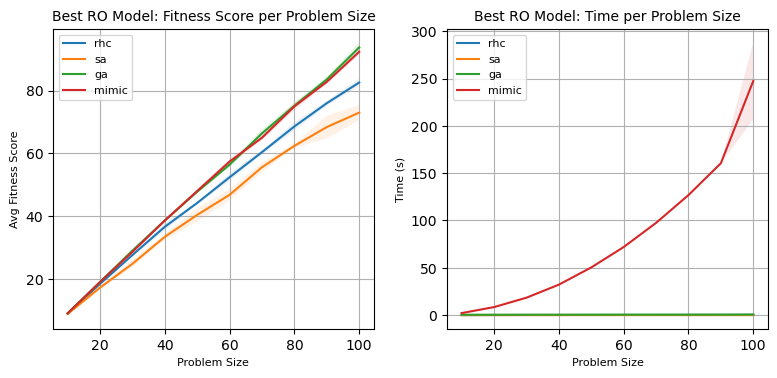

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
size = [*range(10, 110, 10)]
axs[0].plot(size, rhc_fitness_scores, label='rhc')
axs[0].fill_between(size, rhc_fitness_scores_ci_down, rhc_fitness_scores_ci_up, alpha=0.1)
axs[0].plot(size, sa_fitness_scores, label='sa')
axs[0].fill_between(size, sa_fitness_scores_ci_down, sa_fitness_scores_ci_up, alpha=0.1)
axs[0].plot(size, ga_fitness_scores, label='ga')
axs[0].fill_between(size, ga_fitness_scores_ci_down, ga_fitness_scores_ci_up, alpha=0.1)
axs[0].plot(size, mimic_fitness_scores, label='mimic')
axs[0].fill_between(size, mimic_fitness_scores_ci_down, mimic_fitness_scores_ci_up, alpha=0.1)
axs[0].set_title('Best RO Model: Fitness Score per Problem Size', fontsize=10)
axs[0].set_xlabel('Problem Size', fontsize=8)
axs[0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0].legend(loc='best', fontsize=8)
axs[0].grid()

axs[1].plot(size, rhc_fitness_time, label='rhc')
axs[1].fill_between(size, rhc_fitness_time_ci_down, rhc_fitness_time_ci_up, alpha=0.1)
axs[1].plot(size, sa_fitness_time, label='sa')
axs[1].fill_between(size, sa_fitness_time_ci_down, sa_fitness_time_ci_up, alpha=0.1)
axs[1].plot(size, ga_fitness_time, label='ga')
axs[1].fill_between(size, ga_fitness_time_ci_down, ga_fitness_time_ci_up, alpha=0.1)
axs[1].plot(size, mimic_fitness_time, label='mimic')
axs[1].fill_between(size, mimic_fitness_time_ci_down, mimic_fitness_time_ci_up, alpha=0.1)
axs[1].set_title('Best RO Model: Time per Problem Size', fontsize=10)
axs[1].set_xlabel('Problem Size', fontsize=8)
axs[1].set_ylabel('Time (s)', fontsize=8)
axs[1].legend(loc='best', fontsize=8)
axs[1].grid()

fig.tight_layout(pad = 1.5)
plt.savefig('plots/flipflop_best_fitness_problem_size.png', dpi=1200)
plt.show()

### Best Fitness vs Iteration

In [129]:
# Define fitness function
problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)

In [130]:
rhc_array = []
sa_array = []
ga_array = []
mimic_array = []
for seed in seeds:
    # Define optimization problem object
    problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=length)
    
    # Randomized Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    rhc_time = end_time - start_time
    rhc_array.append([rhc_time, rhc_fitness_curve])

    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.GeomDecay(init_temp=.001)
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    sa_time = end_time - start_time
    sa_array.append([sa_time, sa_fitness_curve])

    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 250, mutation_prob = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    ga_time = end_time - start_time
    ga_array.append([ga_time, ga_fitness_curve])

    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 500, keep_pct = .1, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    mimic_time = end_time - start_time
    mimic_array.append([mimic_time, mimic_fitness_curve])

In [131]:
rhc_fitness_scores = []
rhc_fitness_time = []
for j in range(len(rhc_array)):
    rhc_fitness_scores.append(rhc_array[j][1])
    rhc_fitness_time.append(rhc_array[j][0])
rhc_fitness_time_ci = 1.96 * np.std(np.array(rhc_fitness_time)) / np.sqrt(len(rhc_fitness_time))
rhc_fitness_time = sum(rhc_fitness_time) / len(seeds)
rhc_fitness_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,0]
rhc_feval_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,1]
rhc_fitness_scores = np.mean(np.array(rhc_fitness_scores), axis = 0)
rhc_feval_scores = rhc_fitness_scores[:,1]
rhc_fitness_scores = rhc_fitness_scores[:,0]


sa_fitness_scores = []
sa_fitness_time = []
for j in range(len(sa_array)):
    sa_fitness_scores.append(sa_array[j][1])
    sa_fitness_time.append(sa_array[j][0])
sa_fitness_time_ci = 1.96 * np.std(np.array(sa_fitness_time)) / np.sqrt(len(sa_fitness_time))
sa_fitness_time = sum(sa_fitness_time) / len(seeds)
sa_fitness_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,0]
sa_feval_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,1]
sa_fitness_scores = np.mean(np.array(sa_fitness_scores), axis = 0)
sa_feval_scores = sa_fitness_scores[:,1]
sa_fitness_scores = sa_fitness_scores[:,0]


ga_fitness_scores = []
ga_fitness_time = []
for j in range(len(ga_array)):
    ga_fitness_scores.append(ga_array[j][1])
    ga_fitness_time.append(ga_array[j][0])
ga_fitness_time_ci = 1.96 * np.std(np.array(ga_fitness_time)) / np.sqrt(len(ga_fitness_time))
ga_fitness_time = sum(ga_fitness_time) / len(seeds)
ga_fitness_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,0]
ga_feval_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,1]
ga_fitness_scores = np.mean(np.array(ga_fitness_scores), axis = 0)
ga_feval_scores = ga_fitness_scores[:,1]
ga_fitness_scores = ga_fitness_scores[:,0]


mimic_fitness_scores = []
mimic_fitness_time = []
for j in range(len(mimic_array)):
    mimic_fitness_scores.append(mimic_array[j][1])
    mimic_fitness_time.append(mimic_array[j][0])
mimic_fitness_time_ci = 1.96 * np.std(np.array(mimic_fitness_time)) / np.sqrt(len(mimic_fitness_time))
mimic_fitness_time = sum(mimic_fitness_time) / len(seeds)
mimic_fitness_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,0]
mimic_feval_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,1]
mimic_fitness_scores = np.mean(np.array(mimic_fitness_scores), axis = 0)
mimic_feval_scores = mimic_fitness_scores[:,1]
mimic_fitness_scores = mimic_fitness_scores[:,0]

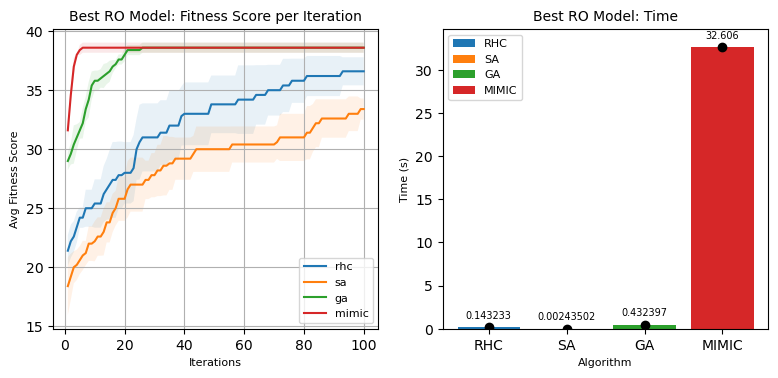

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
iterations = range(1, max_iters+1)
axs[0].plot(iterations, rhc_fitness_scores, label='rhc')
axs[0].fill_between(iterations, rhc_fitness_scores - rhc_fitness_ci, rhc_fitness_scores + rhc_fitness_ci, alpha=0.1)
axs[0].plot(iterations, sa_fitness_scores, label='sa')
axs[0].fill_between(iterations, sa_fitness_scores - sa_fitness_ci, sa_fitness_scores + sa_fitness_ci, alpha=0.1)
axs[0].plot(iterations, ga_fitness_scores, label='ga')
axs[0].fill_between(iterations, ga_fitness_scores - ga_fitness_ci, ga_fitness_scores + ga_fitness_ci, alpha=0.1)
axs[0].plot(iterations, mimic_fitness_scores, label='mimic')
axs[0].fill_between(iterations, mimic_fitness_scores - mimic_fitness_ci, mimic_fitness_scores + mimic_fitness_ci, alpha=0.1)
axs[0].set_title('Best RO Model: Fitness Score per Iteration', fontsize=10)
axs[0].set_xlabel('Iterations', fontsize=8)
axs[0].set_ylabel('Avg Fitness Score', fontsize=8)
axs[0].legend(loc='best', fontsize=8)
axs[0].grid()

algos = ['RHC', 'SA', 'GA', 'MIMIC']
times = [rhc_fitness_time, sa_fitness_time, ga_fitness_time, mimic_fitness_time]
error = [rhc_fitness_time_ci, sa_fitness_time_ci, ga_fitness_time_ci, mimic_fitness_time_ci]
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
axs[1].errorbar(algos, times, yerr=error, fmt="o", color="0")
# axs[1].bar(algos, times, label=algos, color=bar_colors)
axs[1].bar_label(axs[1].bar(algos, times, label=algos, color=bar_colors), label_type='edge', fontsize=7, padding=5)
axs[1].set_title('Best RO Model: Time', fontsize=10)
axs[1].set_xlabel('Algorithm', fontsize=8)
axs[1].set_ylabel('Time (s)', fontsize=8)
axs[1].legend(loc='best', fontsize=8)

fig.tight_layout(pad = 1.5)
plt.savefig('plots/flipflop_best_fitness_iteration.png', dpi=1200)
plt.show()

In [134]:
print('RHC Fitness: ', rhc_fitness_scores[-1])
print('SA Fitness: ', sa_fitness_scores[-1])
print('GA Fitness: ', ga_fitness_scores[-1])
print('MIMIC Fitness: ', mimic_fitness_scores[-1])

RHC Fitness:  36.6
SA Fitness:  33.4
GA Fitness:  38.6
MIMIC Fitness:  38.6


In [135]:
print('RHC Time: ', rhc_fitness_time)
print('SA Time: ', sa_fitness_time)
print('GA Time: ', ga_fitness_time)
print('MIMIC Time: ', mimic_fitness_time)

RHC Time:  0.1432328701019287
SA Time:  0.0024350166320800783
GA Time:  0.43239717483520507
MIMIC Time:  32.60603580474854


### Feature Evaluations vs Iterations

In [136]:
print('RHC Fevals: ', rhc_feval_scores[-1])
print('SA Fevals: ', sa_feval_scores[-1])
print('GA Fevals: ', ga_feval_scores[-1])
print('MIMIC Fevals: ', mimic_feval_scores[-1])

RHC Fevals:  5780.8
SA Fevals:  145.2
GA Fevals:  108.2
MIMIC Fevals:  104.2


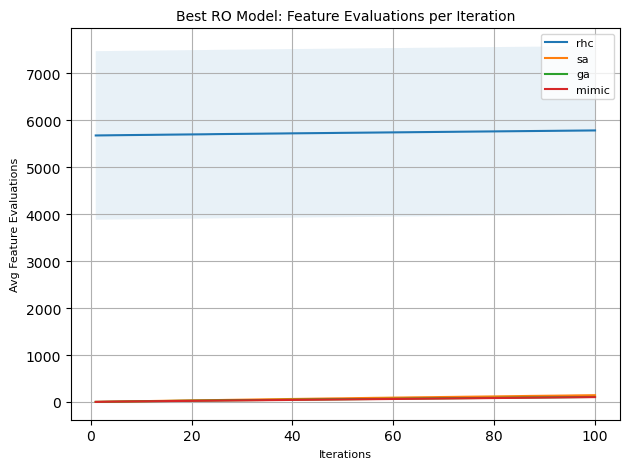

In [122]:
iterations = range(1, max_iters+1)
plt.plot(iterations, rhc_feval_scores, label='rhc')
plt.fill_between(iterations, rhc_feval_scores - rhc_feval_ci, rhc_feval_scores + rhc_feval_ci, alpha=0.1)
plt.plot(iterations, sa_feval_scores, label='sa')
plt.fill_between(iterations, sa_feval_scores - sa_feval_ci, sa_feval_scores + sa_feval_ci, alpha=0.1)
plt.plot(iterations, ga_feval_scores, label='ga')
plt.fill_between(iterations, ga_feval_scores - ga_feval_ci, ga_feval_scores + ga_feval_ci, alpha=0.1)
plt.plot(iterations, mimic_feval_scores, label='mimic')
plt.fill_between(iterations, mimic_feval_scores - mimic_feval_ci, mimic_feval_scores + mimic_feval_ci, alpha=0.1)
plt.title('Best RO Model: Feature Evaluations per Iteration', fontsize=10)
plt.xlabel('Iterations', fontsize=8)
plt.ylabel('Avg Feature Evaluations', fontsize=8)
plt.legend(loc='best', fontsize=8)
plt.tight_layout()
plt.grid()

plt.savefig('plots/flipflop_best_feval_iteration.png', dpi=1200)
plt.show()

## Size = 20, 80

### Feature Evaluation Analysis

In [164]:
problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=80)
iterations = range(10, 160, 100)

In [165]:
# Randomized Hill Climbing
rhc_stats = []
rhc_curves = []
for seed in seeds:
    

    rhc = mlrose.RHCRunner(problem=problem,
                    experiment_name='flipflop_rhc',
                    output_directory='./feval_outputs',
                    seed=seed,
                    iteration_list=[*iterations],
                    max_attempts=max_attempts,
                    restart_list=[0, 25, 75, 100])   

    # the two data frames will contain the results
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    rhc_stats.append(rhc_df_run_stats)
    rhc_curves.append(rhc_df_run_curves)

In [166]:
rhc_best_fitness = pd.DataFrame()
for i in range(len(rhc_curves)):
    best_fitness = rhc_curves[i]['Fitness'].max()
    best_runs = rhc_curves[i][rhc_curves[i]['Fitness'] == best_fitness]
    rhc_best_fitness = pd.concat([rhc_best_fitness, best_runs])

In [167]:
rhc_best_fitness

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
10328,96,0.017782,68.0,8099.0,75,110,66
10329,97,0.017835,68.0,8100.0,75,110,66
10330,98,0.017889,68.0,8101.0,75,110,66
10331,99,0.017942,68.0,8102.0,75,110,66
10332,100,0.017996,68.0,8103.0,75,110,66
...,...,...,...,...,...,...,...
12759,106,0.006809,67.0,1577.0,100,110,12
12760,107,0.006854,67.0,1578.0,100,110,12
12761,108,0.006898,67.0,1579.0,100,110,12
12762,109,0.006944,67.0,1580.0,100,110,12


In [168]:
rhc_min_evals = rhc_best_fitness['FEvals'].min()
rhc_best_curve_run = rhc_best_fitness[rhc_best_fitness['FEvals'] == rhc_min_evals]

In [169]:
rhc_best_curve_run

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
1500,69,0.00528,67.0,1540.0,25,110,12
4361,69,0.00528,67.0,1540.0,75,110,12
12722,69,0.00528,67.0,1540.0,100,110,12


In [170]:
# Simulated Annealing
sa_stats = []
sa_curves = []
for seed in seeds:
    sa = mlrose.SARunner(problem=problem,
                  experiment_name='flipflop_sa',
                  output_directory='./feval_outputs',
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts=max_attempts,
                  temperature_list=[.001, .01, .1, .25, .5, .75, 1],
                  decay_list=[mlrose.GeomDecay])

    # the two data frames will contain the results
    sa_df_run_stats, sa_df_run_curves = sa.run()
    sa_stats.append(sa_df_run_stats)
    sa_curves.append(sa_df_run_curves)

In [171]:
sa_best_fitness = pd.DataFrame()
for i in range(len(sa_curves)):
    best_fitness = sa_curves[i]['Fitness'].max()
    best_runs = sa_curves[i][sa_curves[i]['Fitness'] == best_fitness]
    sa_best_fitness = pd.concat([sa_best_fitness, best_runs])

In [172]:
sa_best_fitness

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
764,98,0.010497,66.0,159.0,1,110
765,99,0.010544,66.0,160.0,1,110
766,100,0.010610,66.0,161.0,1,110
767,101,0.010656,66.0,163.0,1,110
768,102,0.010721,66.0,164.0,1,110
...,...,...,...,...,...,...
550,106,0.007520,63.0,161.0,0.5,110
551,107,0.007567,63.0,162.0,0.5,110
552,108,0.007614,63.0,163.0,0.5,110
553,109,0.007662,63.0,164.0,0.5,110


In [173]:
sa_min_evals = sa_best_fitness['FEvals'].min()
sa_best_curve_run = sa_best_fitness[sa_best_fitness['FEvals'] == sa_min_evals]

In [174]:
sa_best_curve_run

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
86,86,0.006501,63.0,135.0,0.001,110
197,86,0.006501,63.0,135.0,0.01,110
308,86,0.006501,63.0,135.0,0.1,110
419,86,0.006501,63.0,135.0,0.25,110
530,86,0.006501,63.0,135.0,0.5,110


In [175]:
# Genetic Algorithm
ga_stats = []
ga_curves = []
for seed in seeds:
    ga = mlrose.GARunner(problem=problem,
                  experiment_name='flipflop_ga',
                  output_directory='./feval_outputs', # note: specify an output directory to have results saved to disk
                  seed=seed,
                  iteration_list=[*iterations],
                  max_attempts = max_attempts,
                  population_sizes=[10, 20, 50, 100, 150, 200, 250, 500],
                  mutation_rates=[0.1, 0.2, 0.5, 0.75, 1])

    # the two data frames will contain the results
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ga_stats.append(ga_df_run_stats)
    ga_curves.append(ga_df_run_curves)

In [176]:
ga_best_fitness = pd.DataFrame()
for i in range(len(ga_curves)):
    best_fitness = ga_curves[i]['Fitness'].max()
    best_runs = ga_curves[i][ga_curves[i]['Fitness'] == best_fitness]
    ga_best_fitness = pd.concat([ga_best_fitness, best_runs])

In [177]:
ga_best_fitness

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
4377,48,0.016424,79.0,61.0,500,1.00,110
4033,37,0.010793,78.0,51.0,500,0.20,110
4034,38,0.011002,78.0,52.0,500,0.20,110
4035,39,0.011208,78.0,53.0,500,0.20,110
4036,40,0.011417,78.0,54.0,500,0.20,110
...,...,...,...,...,...,...,...
4436,107,0.025958,78.0,126.0,500,1.00,110
4437,108,0.026175,78.0,127.0,500,1.00,110
4438,109,0.026397,78.0,128.0,500,1.00,110
4439,110,0.026615,78.0,129.0,500,1.00,110


In [178]:
ga_min_evals = ga_best_fitness['FEvals'].min()
ga_best_curve_run = ga_best_fitness[ga_best_fitness['FEvals'] == ga_min_evals]

In [179]:
ga_best_curve_run

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
4033,37,0.010793,78.0,51.0,500,0.2,110


In [180]:
# MIMIC
mimic_stats = []
mimic_curves = []
for seed in seeds:
    mmc = mlrose.MIMICRunner(problem=problem,
                      experiment_name='flipflop_mimic',
                      output_directory='./feval_outputs',
                      seed=seed,
                      iteration_list=[*iterations],
                      max_attempts=max_attempts,
                      population_sizes = [10, 20, 50, 100, 150, 200, 250, 500],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75, 0.9],
                      use_fast_mimic = True)
                      
    # the two data frames will contain the results
    mimic_df_run_stats, mimic_df_run_curves = mmc.run()
    mimic_stats.append(mimic_df_run_stats)
    mimic_curves.append(mimic_df_run_curves)

In [195]:
mimic_best_fitness = pd.DataFrame()
for i in range(len(mimic_curves)):
    best_fitness = mimic_curves[i]['Fitness'].max()
    best_runs = mimic_curves[i][mimic_curves[i]['Fitness'] == best_fitness]
    mimic_best_fitness = pd.concat([mimic_best_fitness, best_runs])

In [196]:
mimic_best_fitness

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
4038,25,0.170849,77.0,39.0,True,500,0.50,110
4039,26,0.176856,77.0,40.0,True,500,0.50,110
4040,27,0.183000,77.0,41.0,True,500,0.50,110
4041,28,0.189369,77.0,42.0,True,500,0.50,110
4042,29,0.195576,77.0,43.0,True,500,0.50,110
...,...,...,...,...,...,...,...,...
3983,106,0.026750,78.0,117.0,True,500,0.25,110
3984,107,0.032665,78.0,118.0,True,500,0.25,110
3985,108,0.038574,78.0,119.0,True,500,0.25,110
3986,109,0.044496,78.0,120.0,True,500,0.25,110


In [200]:
mimic_best_fitness.loc[mimic_best_fitness['Fitness'] == 78]

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
3907,12,0.083539,78.0,22.0,True,500,0.25,110
3908,13,0.089460,78.0,23.0,True,500,0.25,110
3909,14,0.095370,78.0,24.0,True,500,0.25,110
3910,15,0.101296,78.0,25.0,True,500,0.25,110
3911,16,0.107231,78.0,26.0,True,500,0.25,110
...,...,...,...,...,...,...,...,...
3983,106,0.026750,78.0,117.0,True,500,0.25,110
3984,107,0.032665,78.0,118.0,True,500,0.25,110
3985,108,0.038574,78.0,119.0,True,500,0.25,110
3986,109,0.044496,78.0,120.0,True,500,0.25,110


In [183]:
mimic_min_evals = mimic_best_fitness['FEvals'].min()
mimic_best_curve_run = mimic_best_fitness[mimic_best_fitness['FEvals'] == mimic_min_evals]

In [184]:
mimic_best_curve_run

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
3891,11,0.068617,77.0,20.0,True,500,0.25,110


### Best Fitness vs Iteration

In [185]:
# Define fitness function
problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=80)

In [186]:
rhc_array = []
sa_array = []
ga_array = []
mimic_array = []
for seed in seeds:
    # Define optimization problem object
    problem = mlrose.FlipFlopGenerator().generate(seed=RANDOM_STATE, size=80)
    
    # Randomized Hill Climbing
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose.random_hill_climb(problem = problem, restarts = 100, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    rhc_time = end_time - start_time
    rhc_array.append([rhc_time, rhc_fitness_curve])

    # Simulated Annealing
    start_time = time.time()
    schedule = mlrose.GeomDecay(init_temp=.001)
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose.simulated_annealing(problem = problem, schedule = schedule, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    sa_time = end_time - start_time
    sa_array.append([sa_time, sa_fitness_curve])

    # Genetic Algorithm
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose.genetic_alg(problem = problem, pop_size = 500, mutation_prob = .2, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    ga_time = end_time - start_time
    ga_array.append([ga_time, ga_fitness_curve])

    # MIMIC
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose.mimic(problem = problem, pop_size = 500, keep_pct = .25, max_iters = max_iters, max_attempts = max_attempts, curve = True, random_state = seed)
    end_time = time.time()
    mimic_time = end_time - start_time
    mimic_array.append([mimic_time, mimic_fitness_curve])

In [187]:
rhc_fitness_scores = []
rhc_fitness_time = []
for j in range(len(rhc_array)):
    rhc_fitness_scores.append(rhc_array[j][1])
    rhc_fitness_time.append(rhc_array[j][0])
rhc_fitness_time_ci = 1.96 * np.std(np.array(rhc_fitness_time)) / np.sqrt(len(rhc_fitness_time))
rhc_fitness_time = sum(rhc_fitness_time) / len(seeds)
rhc_fitness_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,0]
rhc_feval_ci = (1.96 * np.std(np.array(rhc_fitness_scores), axis = 0) / np.sqrt(len(rhc_fitness_scores)))[:,1]
rhc_fitness_scores = np.mean(np.array(rhc_fitness_scores), axis = 0)
rhc_feval_scores = rhc_fitness_scores[:,1]
rhc_fitness_scores = rhc_fitness_scores[:,0]


sa_fitness_scores = []
sa_fitness_time = []
for j in range(len(sa_array)):
    sa_fitness_scores.append(sa_array[j][1])
    sa_fitness_time.append(sa_array[j][0])
sa_fitness_time_ci = 1.96 * np.std(np.array(sa_fitness_time)) / np.sqrt(len(sa_fitness_time))
sa_fitness_time = sum(sa_fitness_time) / len(seeds)
sa_fitness_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,0]
sa_feval_ci = (1.96 * np.std(np.array(sa_fitness_scores), axis = 0) / np.sqrt(len(sa_fitness_scores)))[:,1]
sa_fitness_scores = np.mean(np.array(sa_fitness_scores), axis = 0)
sa_feval_scores = sa_fitness_scores[:,1]
sa_fitness_scores = sa_fitness_scores[:,0]


ga_fitness_scores = []
ga_fitness_time = []
for j in range(len(ga_array)):
    ga_fitness_scores.append(ga_array[j][1])
    ga_fitness_time.append(ga_array[j][0])
ga_fitness_time_ci = 1.96 * np.std(np.array(ga_fitness_time)) / np.sqrt(len(ga_fitness_time))
ga_fitness_time = sum(ga_fitness_time) / len(seeds)
ga_fitness_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,0]
ga_feval_ci = (1.96 * np.std(np.array(ga_fitness_scores), axis = 0) / np.sqrt(len(ga_fitness_scores)))[:,1]
ga_fitness_scores = np.mean(np.array(ga_fitness_scores), axis = 0)
ga_feval_scores = ga_fitness_scores[:,1]
ga_fitness_scores = ga_fitness_scores[:,0]


mimic_fitness_scores = []
mimic_fitness_time = []
for j in range(len(mimic_array)):
    mimic_fitness_scores.append(mimic_array[j][1])
    mimic_fitness_time.append(mimic_array[j][0])
mimic_fitness_time_ci = 1.96 * np.std(np.array(mimic_fitness_time)) / np.sqrt(len(mimic_fitness_time))
mimic_fitness_time = sum(mimic_fitness_time) / len(seeds)
mimic_fitness_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,0]
mimic_feval_ci = (1.96 * np.std(np.array(mimic_fitness_scores), axis = 0) / np.sqrt(len(mimic_fitness_scores)))[:,1]
mimic_fitness_scores = np.mean(np.array(mimic_fitness_scores), axis = 0)
mimic_feval_scores = mimic_fitness_scores[:,1]
mimic_fitness_scores = mimic_fitness_scores[:,0]

In [188]:
print('RHC Fitness: ', rhc_fitness_scores[-1])
print('SA Fitness: ', sa_fitness_scores[-1])
print('GA Fitness: ', ga_fitness_scores[-1])
print('MIMIC Fitness: ', mimic_fitness_scores[-1])

RHC Fitness:  68.6
SA Fitness:  62.4
GA Fitness:  77.2
MIMIC Fitness:  76.6


In [189]:
print('RHC Time: ', rhc_fitness_time)
print('SA Time: ', sa_fitness_time)
print('GA Time: ', ga_fitness_time)
print('MIMIC Time: ', mimic_fitness_time)

RHC Time:  0.2617194175720215
SA Time:  0.003703451156616211
GA Time:  1.069184160232544
MIMIC Time:  129.35037398338318


### Feature Evaluations vs Iterations

In [190]:
print('RHC Fevals: ', rhc_feval_scores[-1])
print('SA Fevals: ', sa_feval_scores[-1])
print('GA Fevals: ', ga_feval_scores[-1])
print('MIMIC Fevals: ', mimic_feval_scores[-1])

RHC Fevals:  4134.6
SA Fevals:  155.8
GA Fevals:  117.0
MIMIC Fevals:  109.6
